In [157]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [158]:
n = 0.001

In [159]:
N = 30

In [160]:
def get_init_w():
    w = []
    value = np.random.uniform(0, 1)
    for _ in range(20):
        w.append(value)
    return w

In [161]:
def create_p(w):
    p = []
    for item in w:
        p.append(item / sum(w))
    return p
        

In [162]:
def single_simulation(p):
    choices = []
    for _ in range(N):
        choices.append(np.random.choice(np.arange(1, 21), p=p))
    return choices

In [163]:
def get_winning_number(choices):
    choices_set = set(choices)
    choices_set = sorted(choices_set, reverse=True)
    lowest_number = -1
    lowest_occ = 31
    for number in choices_set:
        if 0 < choices.count(number) and choices.count(number) < lowest_occ:
            lowest_number = number
            lowest_occ = choices.count(number)
    return lowest_number

In [164]:
def get_updated_w(w, choices):
    winning_nuber = get_winning_number(choices)
    new_w = []
    for i in range(len(w)):
        if i + 1 == winning_nuber:
            new_w.append(w[i] + ((-n*w[i]) + n))
        else:
             new_w.append(w[i] + (-n*w[i]))
    return new_w


In [165]:
trial_count = 500000

In [166]:
def learning_simulation(trial_count, init_w):
    p_values = []
    w = init_w
    for _ in range(trial_count):
        p = create_p(w)
        p_values.append(p)
        choices = single_simulation(p)
        w = get_updated_w(w, choices)
    return p_values, w


In [167]:
p_values, w = learning_simulation(trial_count, get_init_w())

In [168]:
def simulation(trial_count, w):
    chosen = {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0,
              11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0}
    winner = {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0,
              11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0}
    for _ in range(trial_count):
        p = create_p(w)
        p_values.append(p)
        choices = single_simulation(p)
        for choice in choices:
            chosen[choice] += 1
        winner[get_winning_number(choices)] += 1
    return chosen, winner


In [169]:
chosen, winner = simulation(100000, w)

In [170]:
df = pd.DataFrame()
df = pd.DataFrame([chosen, winner], index=['chosen', 'winner'])
df.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
chosen,0,0,0,0,0,0,0,0,84926,123539,174817,211953,248539,249878,288423,286868,310962,329706,351659,338730
winner,0,0,0,0,0,0,0,0,2651,4569,6255,7185,7792,9522,9092,10811,10522,10355,9667,11579


In [187]:
df = df.drop(columns=[1, 2, 3, 4, 5, 6, 7, 8], axis=1)
df.head()

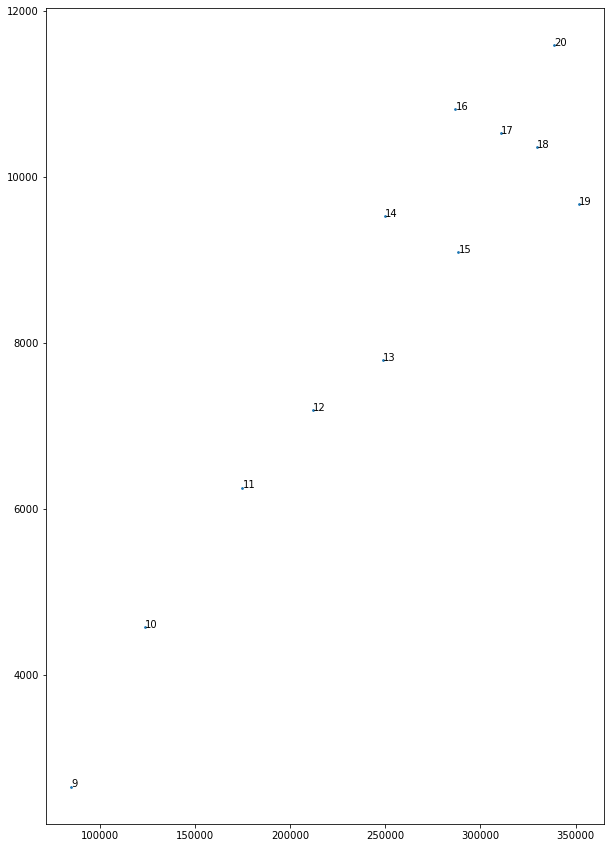

In [212]:
fig, ax = plt.subplots(figsize=(10, 15))
plt.scatter(df.loc['chosen'], df.loc['winner'] , s=3)
for i, txt in enumerate(df.columns):
    ax.annotate(txt, (df.loc['chosen'].loc[i + 9], df.loc['winner'].loc[i + 9]))
plt.savefig('ex10-occ-win.png')

In [172]:
def get_p_value_by_index(index):
    values = []
    for item in p_values:
        values.append(item[index])
    return values

In [173]:
values = get_p_value_by_index(-1)

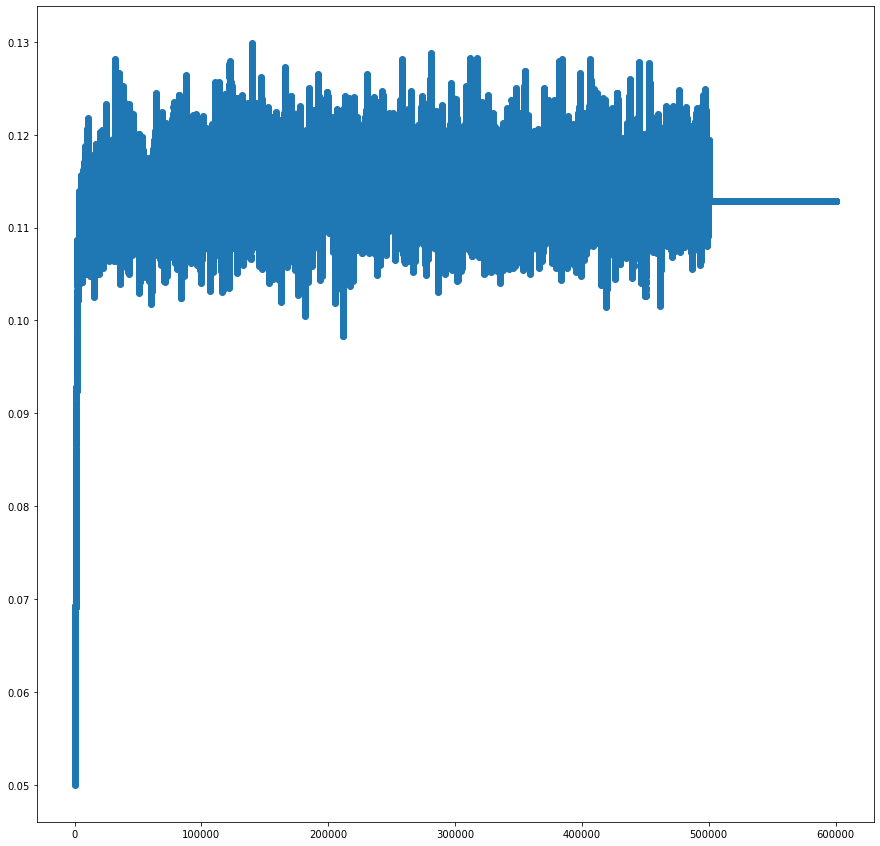

In [174]:
fig, ax = plt.subplots(figsize=(15, 15))
plt.scatter(range(len(values)), values)
plt.savefig('ex10_p_20.png')

In [175]:
values_5 = get_p_value_by_index(4)

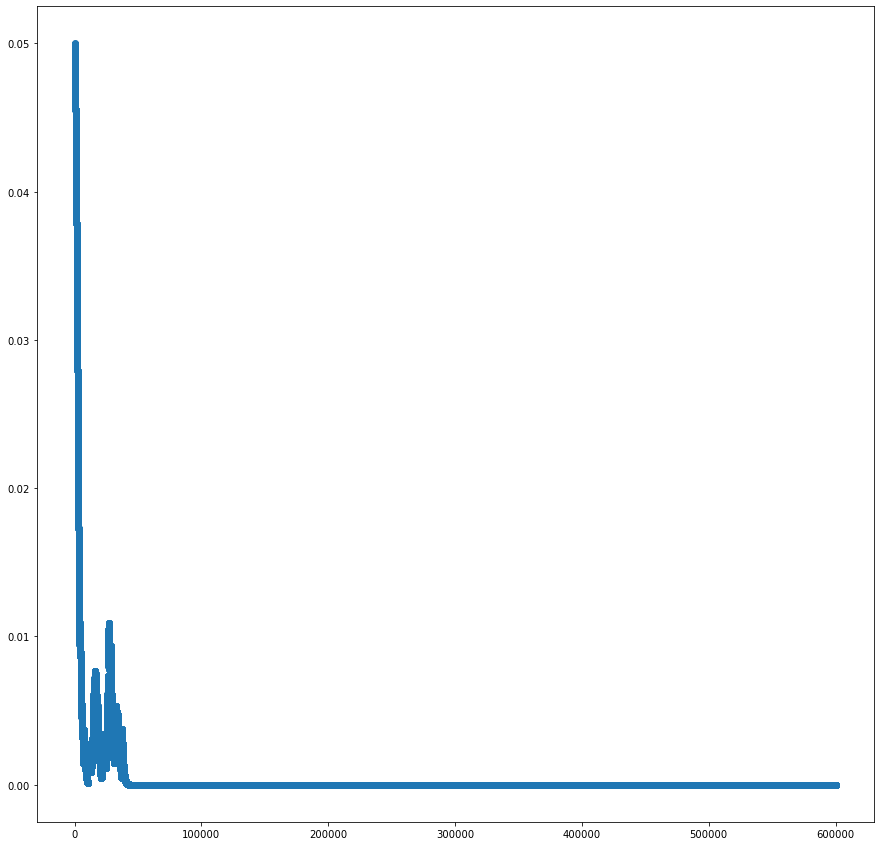

In [176]:
fig, ax = plt.subplots(figsize=(15, 15))
plt.scatter(range(len(values_5)), values_5)
plt.savefig('ex10_p_5.png')